In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

unicaja = df[df['empresa'] == 'Unicaja']

unicaja.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

unicaja = unicaja [['date','open','high','low','close','adj close']]

unicaja.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

unicaja['date'] = pd.to_datetime(unicaja['date'], format="%Y-%m-%d")

unicaja.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 42680 to 44004
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

unicaja.sort_values(by='date',ascending= True, inplace=True)

unicaja.head()

,date,open,high,low,close,adj close
42802,2019-01-02,1.149,1.149,1.120,1.141,1.008117
42803,2019-01-03,1.137,1.146,1.121,1.129,0.997514
42804,2019-01-04,1.143,1.158,1.134,1.157,1.022253
42805,2019-01-07,1.150,1.169,1.142,1.157,1.022253
42806,2019-01-08,1.157,1.169,1.146,1.159,1.024020


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

unicaja = unicaja[(unicaja['date'] >= fecha_inicio) & (unicaja['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

unicaja.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=unicaja['date'].min(), end=unicaja['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

unicaja = unicaja.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

unicaja = unicaja.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

unicaja.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,0.7290,0.7290,0.6940,0.7160,0.656343
1,2021-01-05,0.7050,0.7145,0.6830,0.6870,0.629759
2,2021-01-06,0.6900,0.7060,0.6800,0.6950,0.637092
3,2021-01-07,0.7060,0.7060,0.6880,0.7050,0.646259
4,2021-01-08,0.7060,0.7095,0.6975,0.7045,0.645801
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,0.7070,0.7145,0.6960,0.7025,0.643968
8,2021-01-12,0.7030,0.7160,0.7015,0.7060,0.647176
9,2021-01-13,0.7035,0.7080,0.6950,0.6955,0.637551


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

unicaja = unicaja.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


unicaja.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,0.7290,0.7290,0.6940,0.7160,0.656343
1,2021-01-05,0.7050,0.7145,0.6830,0.6870,0.629759
2,2021-01-06,0.6900,0.7060,0.6800,0.6950,0.637092
3,2021-01-07,0.7060,0.7060,0.6880,0.7050,0.646259
4,2021-01-08,0.7060,0.7095,0.6975,0.7045,0.645801
5,2021-01-09,0.7060,0.7095,0.6975,0.7045,0.645801
6,2021-01-10,0.7060,0.7095,0.6975,0.7045,0.645801
7,2021-01-11,0.7070,0.7145,0.6960,0.7025,0.643968
8,2021-01-12,0.7030,0.7160,0.7015,0.7060,0.647176
9,2021-01-13,0.7035,0.7080,0.6950,0.6955,0.637551


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

unicaja = unicaja.set_index('date')

unicaja.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,0.7290,0.7290,0.6940,0.7160,0.656343
2021-01-05,0.7050,0.7145,0.6830,0.6870,0.629759
2021-01-06,0.6900,0.7060,0.6800,0.6950,0.637092
2021-01-07,0.7060,0.7060,0.6880,0.7050,0.646259
2021-01-08,0.7060,0.7095,0.6975,0.7045,0.645801
2021-01-09,0.7060,0.7095,0.6975,0.7045,0.645801
2021-01-10,0.7060,0.7095,0.6975,0.7045,0.645801
2021-01-11,0.7070,0.7145,0.6960,0.7025,0.643968
2021-01-12,0.7030,0.7160,0.7015,0.7060,0.647176


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

unicaja.index = pd.DatetimeIndex(unicaja.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

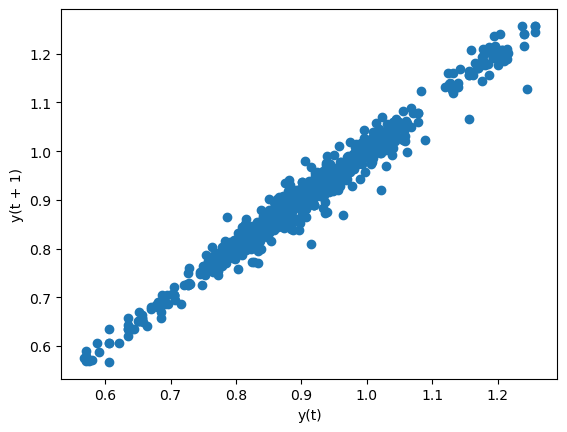

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(unicaja.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = unicaja.close[:-10], unicaja.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(unicaja.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    0.963128
2024-02-22    0.962761
2024-02-23    0.962398
2024-02-24    0.962040
2024-02-25    0.961686
2024-02-26    0.961337
2024-02-27    0.960992
2024-02-28    0.960651
2024-02-29    0.960315
2024-03-01    0.959982
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    0.9610
2024-02-22    0.9770
2024-02-23    0.9680
2024-02-24    0.9680
2024-02-25    0.9680
2024-02-26    0.9720
2024-02-27    0.9750
2024-02-28    0.9635
2024-02-29    0.9445
2024-03-01    0.9565
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.00810620194108338

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,0.9610,0.963128,0.002128
2024-02-22,0.9770,0.962761,-0.014239
2024-02-23,0.9680,0.962398,-0.005602
2024-02-24,0.9680,0.962040,-0.005960
2024-02-25,0.9680,0.961686,-0.006314
2024-02-26,0.9720,0.961337,-0.010663
2024-02-27,0.9750,0.960992,-0.014008
2024-02-28,0.9635,0.960651,-0.002849
2024-02-29,0.9445,0.960315,0.015815
2024-03-01,0.9565,0.959982,0.003482
